**Support Vector Machine From Scratch**

## Data preprocessing

In [492]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [493]:
#Reading data
data = pd.read_csv('data.csv')

#Encoding categorical variable M = 1 and B = -1
diagnosis_map = {'M':1, 'B':-1}
data['diagnosis'] = data['diagnosis'].map(diagnosis_map)

# drop last column (extra column added by pd)
# and unnecessary first column (id)
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [494]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [495]:
#Getting X and Y
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [496]:
#Splitting dataset
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [497]:
#Feature scaling X train and X test
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [498]:
#Adding column of 1 for each row of X_train and X_test as bias/intercept b
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis = 1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis = 1)

print(X_train.shape)
print(X_test.shape)

(455, 31)
(114, 31)


## SVM Model

Cost function:

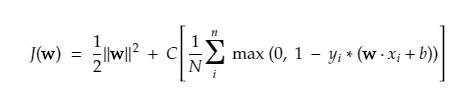

In [499]:
def cost_func(C, W, X, Y):
  M = X.shape[0]

  distances = 1 - (Y * (np.dot(X, W))) #X already has b
  distances[distances < 0] = 0  # equivalent to max(0, distance)

  cost = C * (np.sum(distances) / M)
  cost += float(((1/2) * np.dot(W.T, W)))
  return cost

Gradient descent equation:

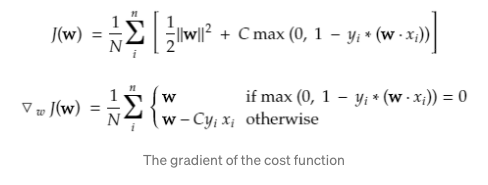

In [500]:
def gradient_func(C, W, X, Y):
  #print("X ", X)
  #print("Y ", Y)
  #print("W ", W)
  distance = 1 - (Y * np.matmul(X, W))
  
  if max(0, distance) == 0:
      di = W
  else:
      di = W - (C * (Y * X))

  return di

Epoch:  0 cost:  940.3019694649082
Epoch:  500 cost:  128.2746016443837
Epoch:  1000 cost:  121.36598363732911
Epoch:  1500 cost:  119.22885009817176
Epoch:  2000 cost:  118.41769861390982
Epoch:  2500 cost:  118.20240434259694
Epoch:  3000 cost:  118.07215080458661
Epoch:  3500 cost:  117.99565362336367
Epoch:  4000 cost:  117.92131442242709
Epoch:  4500 cost:  117.89174435313998


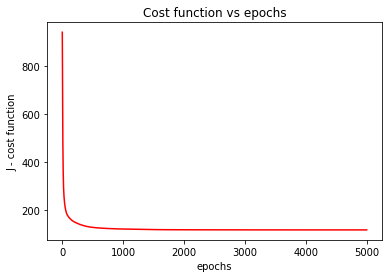

In [501]:
#Stochastic gradient descent
epochs = 5000
weights = np.zeros((X_train.shape[1]))
C = 1000
cost_list = []
alpha = 0.000001

for i in range(epochs):
  for ind, x in enumerate(X_train):
    dw = gradient_func(C, weights, x, Y_train[ind])
    weights = weights - (alpha * dw)

  cost = cost_func(C, weights, X_train, Y_train)
  cost_list.append(cost) 

  if(i % 500 == 0):
    print("Epoch: ", i, "cost: ", cost)
     
#Plotting cost function vs epochs
plt.plot(list(range(epochs)), cost_list, '-r')
plt.title("Cost function vs epochs")
plt.xlabel("epochs")
plt.ylabel("J - cost function")
plt.show()

In [502]:
#Test set results
Y_pred = np.array([])
for i in range(X_test.shape[0]):
    yp = np.sign(np.dot(W, X_test[i])) #model
    Y_pred = np.append(Y_pred, yp)

print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("Precision: ", precision_score(Y_test, Y_pred))
print("Recall: ", recall_score(Y_test, Y_pred))

Accuracy:  0.9736842105263158
Precision:  1.0
Recall:  0.9285714285714286


In [503]:
#Train set results
Y_pred = np.array([])
for i in range(X_train.shape[0]):
    yp = np.sign(np.dot(W, X_train[i])) #model
    Y_pred = np.append(Y_pred, yp)

print("Accuracy: ", accuracy_score(Y_train, Y_pred))
print("Precision: ", precision_score(Y_train, Y_pred))
print("Recall: ", recall_score(Y_train, Y_pred))

Accuracy:  0.9824175824175824
Precision:  0.9655172413793104
Recall:  0.9882352941176471
